In [1]:
import numpy as np 

a = np.identity(3)

In [2]:
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [3]:
np.random.beta(5, 5, size=3)

array([0.5985674 , 0.50067359, 0.60755203])

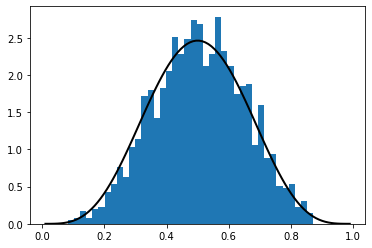

In [4]:
from scipy.stats import beta
import matplotlib.pyplot as plt 
%matplotlib inline

q = beta(5, 5)
obs = q.rvs(2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [5]:
q.cdf(0.4)

0.26656768000000003

In [6]:
q.ppf(0.8)

0.6339134834642708

In [7]:
q.mean()

0.5

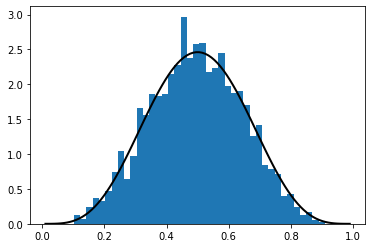

"\nq = beta(5, 5)\nobs = q.rvs(2000)\ngrid = np.linspace(0.01, 0.99, 100)\n\nfig, ax = plt.subplots()\nax.hist(obs, bins=40, density=True)\nax.plot(grid, q.pdf(grid), 'k-', linewidth=2)\nplt.show()\n\n"

In [8]:
obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()
'''
q = beta(5, 5)
obs = q.rvs(2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

'''

In [9]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
print(gradient, intercept, r_value, p_value, std_err)

2.0047332333718706 -0.007301374136953323 0.998847319725967 4.364302408565582e-263 0.006846508124418205


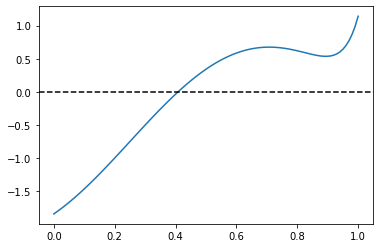

In [10]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.axhline(ls="--", c="k")
plt.show()

In [11]:
# Bisection 二分法
def bisect(f, a, b, tol=10e-5):

    lower, upper = a, b
    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:
            lower, upper = lower, middle
        else:
            lower, upper = middle, upper
    return 0.5 * (upper + lower)

In [16]:
bisect(f, 0, 1)

0.408294677734375

In [19]:
from scipy.optimize import bisect
bisect(f, 0, 1)

0.4082935042806639

In [21]:
from scipy.optimize import newton
newton(f, 0.2)

0.40829350427935673

In [22]:
newton(f, 0.7) # failure of convergence

0.7001700000000279

In [23]:
from scipy.optimize import brentq
brentq(f, 0, 1)

0.40829350427936706

In [24]:
%timeit brentq(f, 0, 1)

31.1 µs ± 4.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
%timeit bisect(f, 0, 1)

123 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [26]:
from scipy.optimize import fixed_point
fixed_point(lambda x: x**2, 10.0)

array(1.)

In [27]:
from scipy.optimize import fminbound
fminbound(lambda x: x**2, -1, 2)

0.0

In [28]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337